# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('./input/SINASC_2019.csv', sep=';')

/var/folders/wh/_2xtz5kd2knd10y0m8tmqhrc0000gp/T/ipykernel_6703/215406632.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./input/SINASC_2019.csv', sep=';')


In [4]:
df.head(10)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR
0,1,2515504.0,110002,1,31.0,2.0,5.0,999992.0,1.0,0.0,...,0.0,NaN,8.0,0.0,1,1.0,5,1,5,1018
1,1,2516292.0,110015,1,34.0,4.0,4.0,621005.0,1.0,0.0,...,3.0,27042019.0,12.0,0.0,1,1.0,5,1,5,5430
2,1,5618347.0,110020,1,35.0,2.0,4.0,621005.0,1.0,0.0,...,3.0,26012019.0,12.0,0.0,1,1.0,4,1,5,6228
3,1,5618347.0,110020,1,26.0,5.0,5.0,NaN,1.0,NaN,...,3.0,2032019.0,7.0,0.0,1,1.0,5,1,4,7059
4,1,5618347.0,110020,1,23.0,5.0,3.0,999992.0,4.0,0.0,...,3.0,30032019.0,2.0,0.0,1,1.0,3,1,2,7284
5,1,4001303.0,110020,1,25.0,1.0,4.0,NaN,3.0,0.0,...,4.0,25042019.0,12.0,0.0,1,1.0,5,1,2,7965
6,1,3970442.0,110020,1,16.0,1.0,3.0,999991.0,0.0,0.0,...,4.0,12022019.0,11.0,0.0,1,1.0,1,0,2,9412
7,1,2798484.0,110030,1,27.0,2.0,4.0,999992.0,1.0,0.0,...,0.0,18012019.0,6.0,0.0,1,1.0,5,1,5,11609
8,1,2798484.0,110030,1,16.0,1.0,4.0,999992.0,0.0,0.0,...,0.0,24012019.0,6.0,0.0,1,1.0,6,0,5,11644
9,1,5915104.0,110045,1,39.0,2.0,5.0,521130.0,2.0,2.0,...,3.0,12062019.0,8.0,0.0,1,1.0,3,1,5,13307


In [5]:
df.columns
# print('total', df.isna().sum() / len(df.index))
# df.shape

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR'],
      dtype='object')

In [6]:

print('APGAR1', df['APGAR1'].isna().sum() / df['APGAR1'].count())
print('APGAR5', df['APGAR5'].isna().sum() / df['APGAR5'].count())
print('SEXO', df['SEXO'].isna().sum() / df['SEXO'].count())
print('GESTACAO', df['GESTACAO'].isna().sum() / df['GESTACAO'].count())
print('ESTCIVMAE', df['ESTCIVMAE'].isna().sum() / df['ESTCIVMAE'].count())

APGAR1 0.015771278141287294
APGAR5 0.015874498685028725
SEXO 0.0
GESTACAO 0.012549065599084523
ESTCIVMAE 0.006063614990815594


In [86]:
# limpar dados nulos e inconsistestes
df2 = df[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']].dropna()
df2.head(8)

df2 = df2[df2['APGAR1'] < 99.0]
df2 = df2[df2['APGAR5'] < 99.0]
df2 = df2[df2['SEXO'] != 0]

In [87]:
# verificando dados nulos no novo dataframe
print(df2.isna().sum() / len(df2.index))
print(df2.dtypes)

APGAR1       0.0
APGAR5       0.0
SEXO         0.0
GESTACAO     0.0
ESTCIVMAE    0.0
CONSULTAS    0.0
dtype: float64
APGAR1       float64
APGAR5       float64
SEXO           int64
GESTACAO     float64
ESTCIVMAE    float64
CONSULTAS    float64
dtype: object


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [88]:
df2['APGAR1'].unique()

array([ 9., 10.,  8.,  5.,  6.,  3.,  7.,  2.,  1.,  4.,  0.])

<AxesSubplot:xlabel='ESTCIVMAE', ylabel='count'>

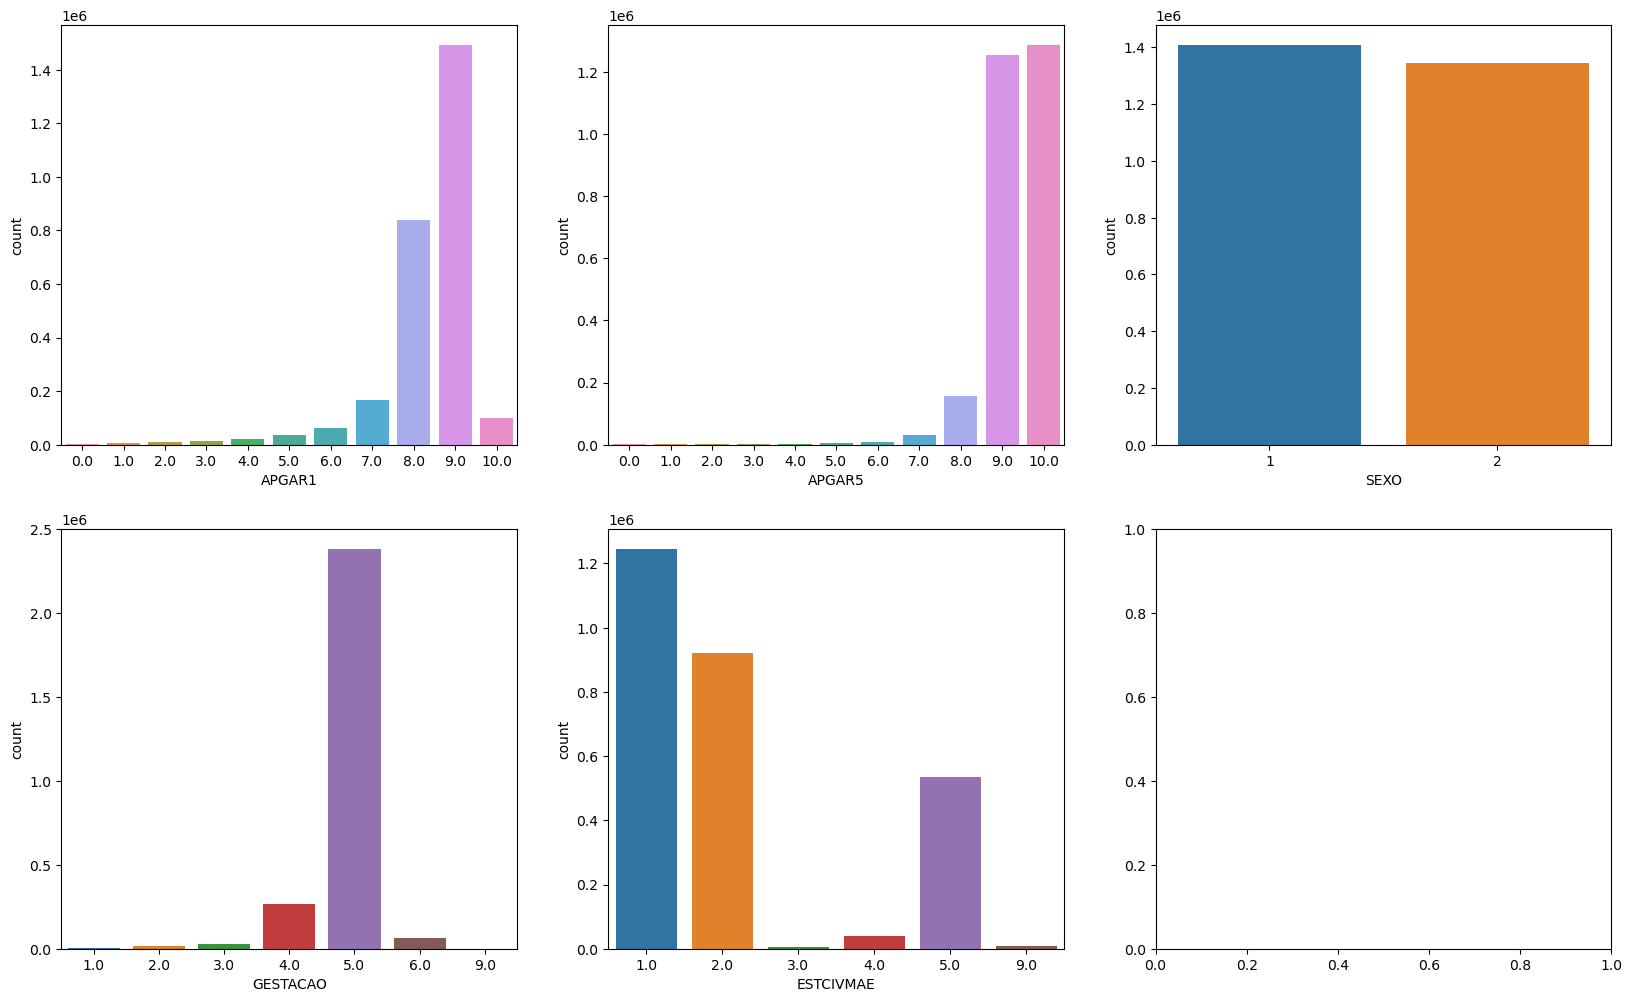

In [89]:
plt.rc('figure', figsize=(20, 12))
fig, axes = plt.subplots(2, 3)

sns.countplot(ax=axes[0, 0], x='APGAR1', data=df2)
sns.countplot(ax=axes[0, 1], x='APGAR5', data=df2)
sns.countplot(ax=axes[0, 2], x='SEXO', data=df2)
sns.countplot(ax=axes[1, 0], x='GESTACAO', data=df2)
sns.countplot(ax=axes[1, 1], x='ESTCIVMAE', data=df2)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<AxesSubplot:xlabel='CONSULTAS', ylabel='APGAR5'>

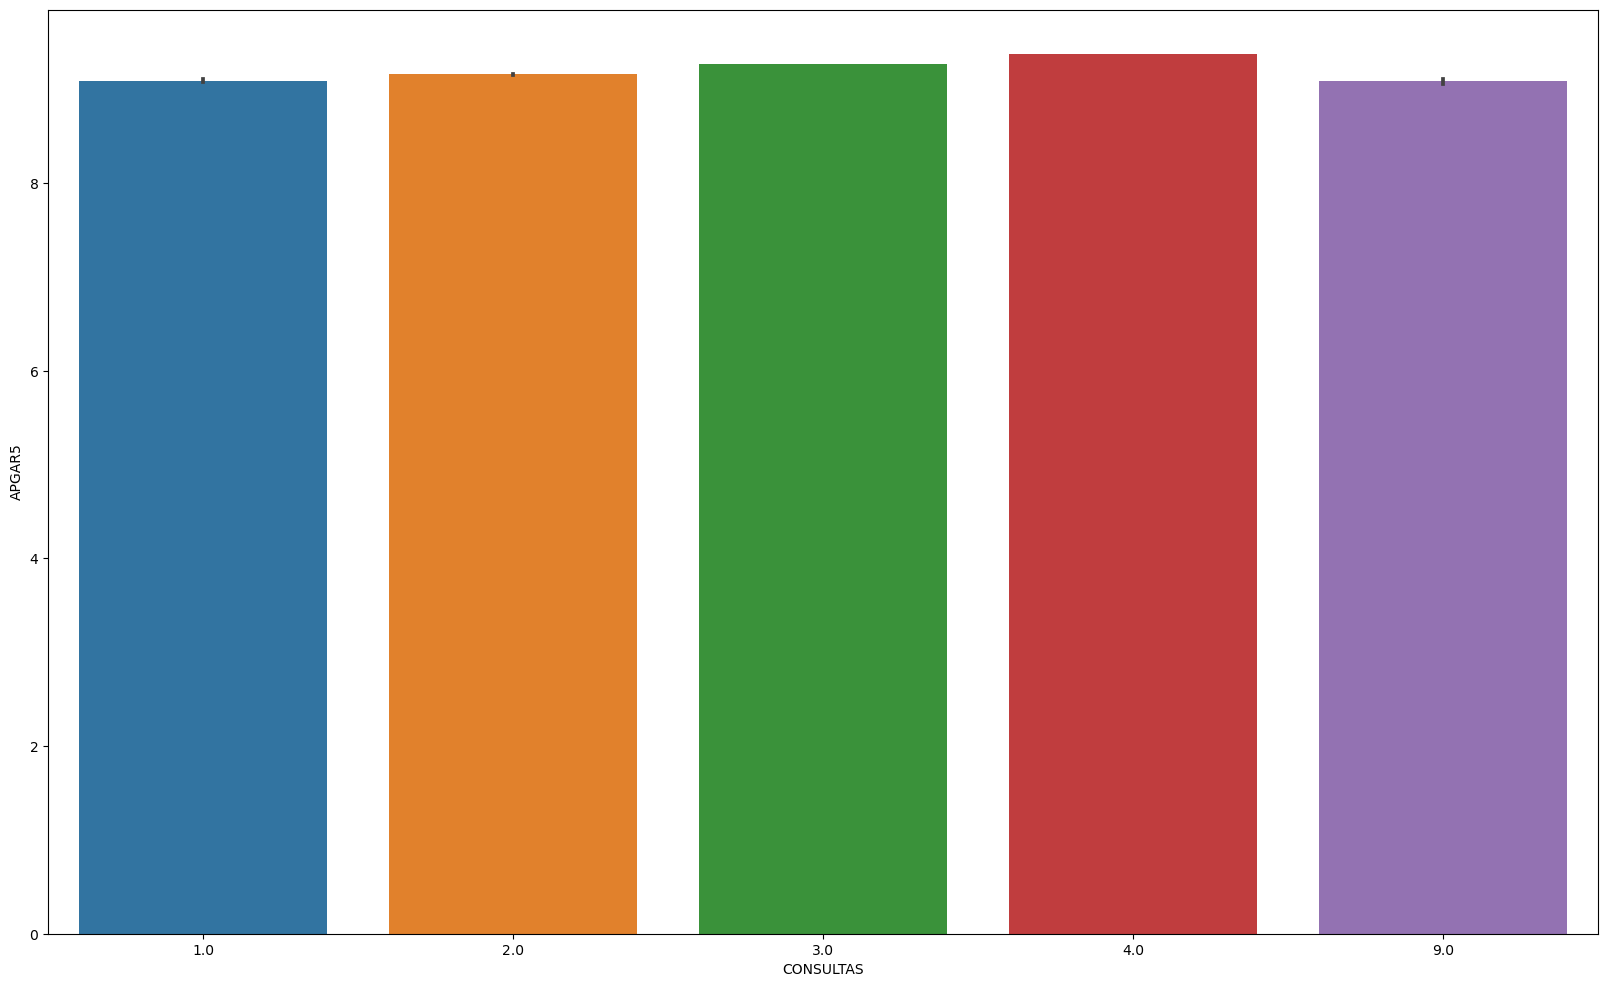

In [92]:
plt.rc('figure', figsize=(20, 12))
fig, axes = plt.subplots()

sns.barplot(x='CONSULTAS', y='APGAR5', data=df2) # graficos de barra

# ajustar o espaçamento
# plt.subplots_adjust(wspace=0, hspace=0)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<AxesSubplot:xlabel='CONSULTAS', ylabel='count'>

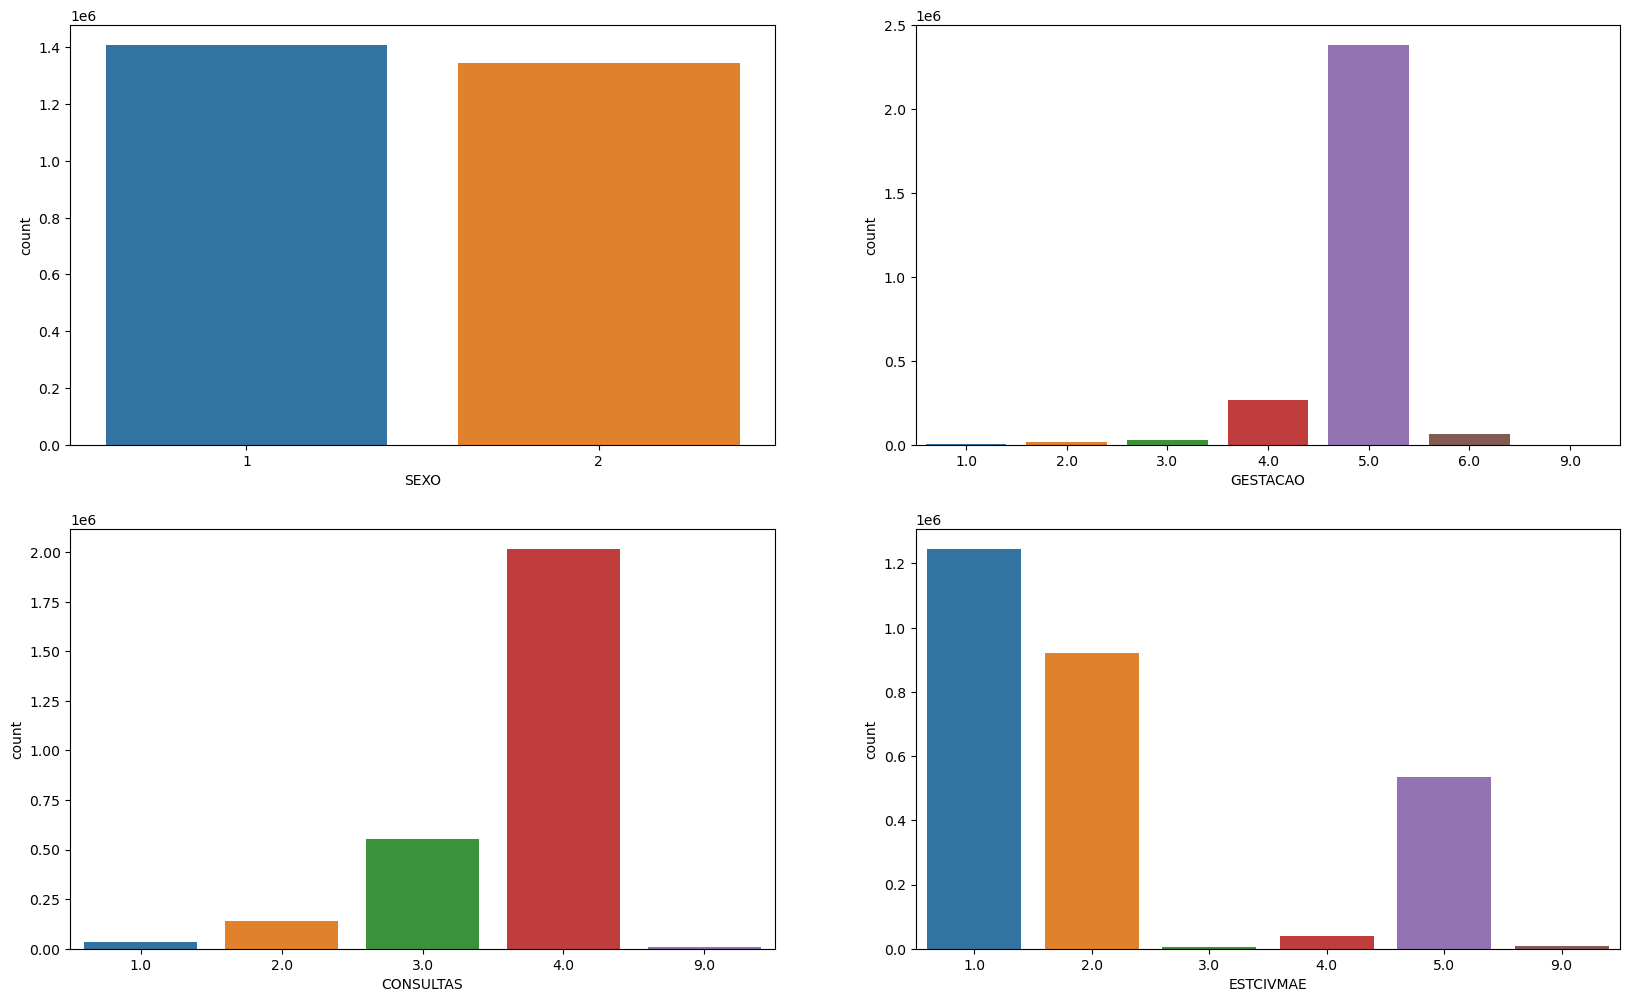

In [94]:
plt.rc('figure', figsize=(20, 12))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax=axes[0, 0], x='SEXO', data=df2)
sns.countplot(ax=axes[0, 1], x='GESTACAO', data=df2)
sns.countplot(ax=axes[1, 1], x='ESTCIVMAE', data=df2)
sns.countplot(ax=axes[1, 0], x='CONSULTAS', data=df2)